In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

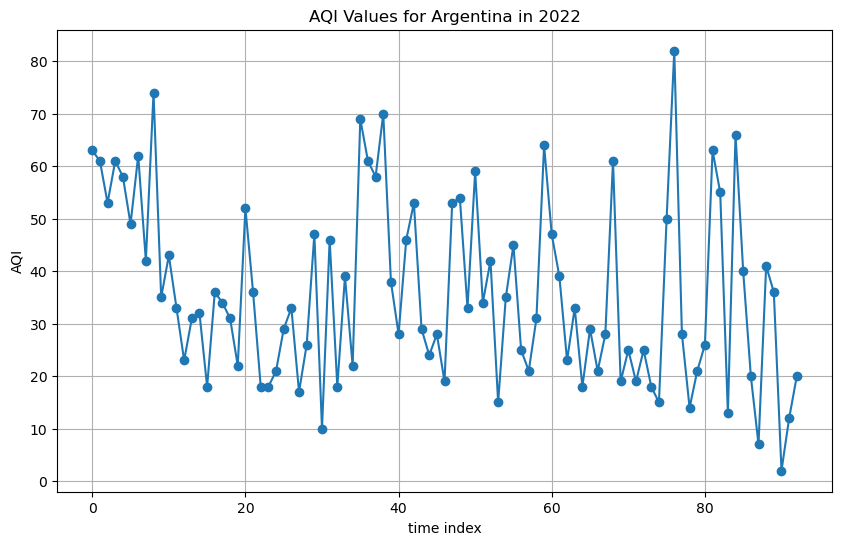

In [7]:
df = pd.read_csv("AQI-2022.csv")
argentina_data = df[df.iloc[:, 1] == "Argentina"]
y_values = argentina_data.iloc[:, 3]
x_values = np.arange(len(y_values))
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')
plt.title("AQI Values for Argentina in 2022")
plt.xlabel("time index")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

In [9]:
pip install statsmodels


     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.4 MB 435.7 kB/s eta 0:00:22
     - -------------------------------------- 0.3/9.4 MB 2.0 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/9.4 MB 3.6 MB/s eta 0:00:03
     ---- ----------------------------------- 1.1/9.4 MB 4.6 MB/s eta 0:00:02
     ------ --------------------------------- 1.5/9.4 MB 5.2 MB/s eta 0:00:02
     -------- ------------------------------- 2.0/9.4 MB 5.9 MB/s eta 0:00:02
     ---------- ----------------------------- 2.5/9.4 MB 6.5 MB/s eta 0:00:02
     ------------- -------------------------- 3.1/9.4 MB 7.0 MB/s eta 0:00:01
     -------------- ------------------------- 3.5/9.4 MB 7.1 MB/s eta 0:00:01
     ---------------- ----------------------- 3.9/9.4 MB 7.5 MB/s eta 0:00:01
     ------------------- -------------------- 4.6/9.4 MB 7.8 MB/s eta 0:00:

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(y_values)

# Display all the results
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"P-value: {result[1]}")
print(f"Lags Used: {result[2]}")
print(f"Number of Observations Used: {result[3]}")
print(f"Critical Values:")
for key, value in result[4].items():
    print(f"  {key}: {value}")

ADF Test Results:
ADF Statistic: -7.296219740782088
P-value: 1.375762285336978e-10
Lags Used: 0
Number of Observations Used: 92
Critical Values:
  1%: -3.503514579651927
  5%: -2.893507960466837
  10%: -2.583823615311909


In [21]:
# Data is apparently stationary...

from statsmodels.tsa.arima.model import ARIMA

p, d, q = 1, 0, 1  # Replace with appropriate values

model = ARIMA(y_values, order=(p, d, q))
model_fit = model.fit()

forecast_steps = 500
# Forecast future values
# Replace 'forecast_steps' with the number of future steps you want to forecast
forecast = model_fit.forecast(steps=forecast_steps)

print(forecast)

C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


93     27.994620
94     30.307112
95     31.955116
96     33.129571
97     33.966549
         ...    
588    36.042347
589    36.042347
590    36.042347
591    36.042347
592    36.042347
Name: predicted_mean, Length: 500, dtype: float64


C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


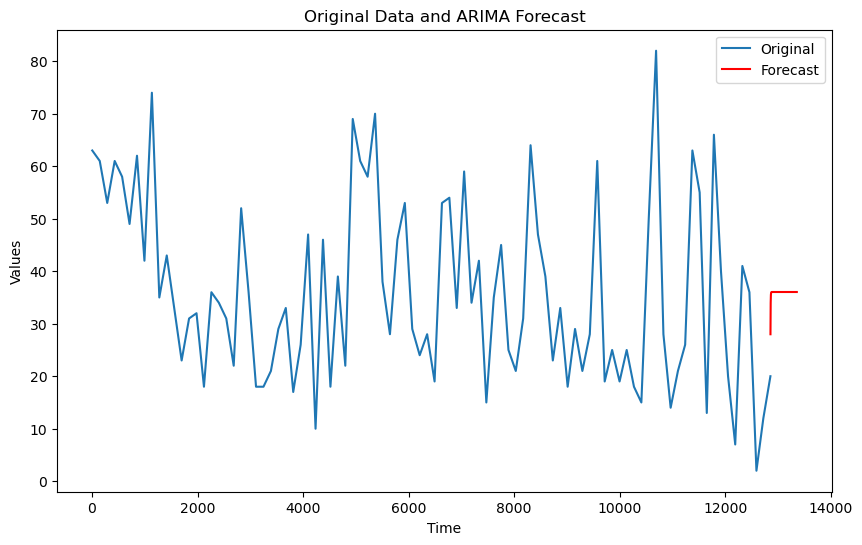

In [22]:
# Create a time index for the forecast
# This assumes your time index is a simple range. Adjust if your time index is more complex.
last_date = y_values.index[-1]
forecast_index = pd.RangeIndex(start=last_date + 1, stop=last_date + forecast_steps + 1, step=1)

# Plotting the original and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(y_values, label='Original')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Original Data and ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
#ARIMA model doesn't seem adequate, SARIMA would likely work better